## Clustering Account IDs based on Loan Amount and Balance

In [8]:
import pandas as pd

In [9]:
df=pd.read_csv("Master_Table_Updated_new.csv")

In [10]:
df.head()

,card_id,disp_id,type,issued,account_id,disposition_client_id,disposition_type,client_id,birth_number,district_id,...,balance,k_symbol.1,bank,account,loan_id,loan_date,loan_amount,duration,payments,status
0,159,946,classic,950501 00:00:00,790,946,OWNER,946,510806,54,...,300.0,NaN,NaN,NaN,5126,940724,208128,48,4336,B
1,159,946,classic,950501 00:00:00,790,946,OWNER,946,510806,54,...,9900.0,NaN,NaN,NaN,5126,940724,208128,48,4336,B
2,159,946,classic,950501 00:00:00,790,946,OWNER,946,510806,54,...,42599.0,NaN,NaN,NaN,5126,940724,208128,48,4336,B
3,159,946,classic,950501 00:00:00,790,946,OWNER,946,510806,54,...,42658.2,UROK,NaN,NaN,5126,940724,208128,48,4336,B
4,159,946,classic,950501 00:00:00,790,946,OWNER,946,510806,54,...,48117.2,NaN,NaN,NaN,5126,940724,208128,48,4336,B


In [11]:
df.columns

Index(['card_id', 'disp_id', 'type', 'issued', 'account_id',
       'disposition_client_id', 'disposition_type', 'client_id',
       'birth_number', 'district_id', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7',
       'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'order_id',
       'bank_to', 'account_to', 'amount', 'k_symbol', 'account_date',
       'account_district_id', 'frequency', 'trans_id', 'account_id.1', 'date',
       'type.1', 'operation', 'amount.1', 'balance', 'k_symbol.1', 'bank',
       'account', 'loan_id', 'loan_date', 'loan_amount', 'duration',
       'payments', 'status'],
      dtype='object')

In [12]:
x=df[['loan_amount','balance']]

In [13]:
x.head()

,loan_amount,balance
0,208128,300.0
1,208128,9900.0
2,208128,42599.0
3,208128,42658.2
4,208128,48117.2


In [14]:
from sklearn.cluster import KMeans

In [15]:
km=KMeans(n_clusters=5)

In [16]:
mod=km.fit(x)

In [17]:
pred=mod.predict(x)

In [18]:
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 4, 4, 0, 4, 4, 0, 4, 0, 0, 4, 4, 0,
       4, 4, 0, 4, 0, 0, 4, 4, 0, 4, 4, 0, 4, 0, 0, 4, 4, 0, 4, 4, 0, 4,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [19]:
x.insert(0,'Account_id',df['account_id'])

In [20]:
x['Cluster']=pred

<ipython-input-20-dcf220ab3d60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Cluster']=pred


In [21]:
import seaborn as sns

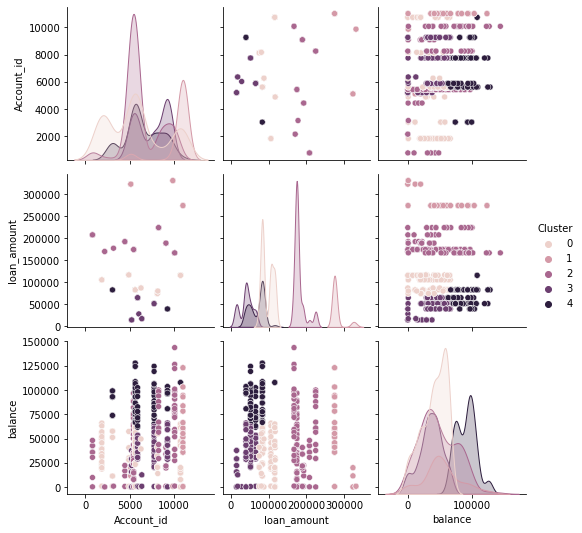

In [22]:
sns.pairplot(x,hue='Cluster')

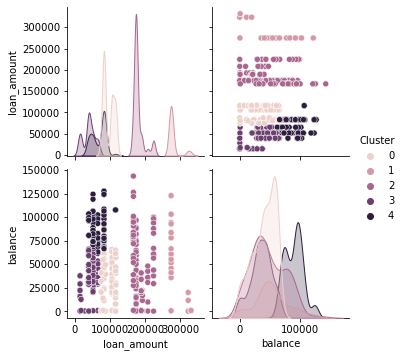

In [23]:
sns.pairplot(x,hue='Cluster',vars=['loan_amount','balance'])

### Accuracy Score For Clustering

In [24]:
from sklearn.metrics import silhouette_score

In [25]:
silhouette_score(x,km.labels_)*100#here the accuracy is below 50% should change the no of clusters

48.66802562727289

### Finding number of clusters using Elbow Method

In [26]:
wcss=[]
wcss2=[]
for i in range(1,15):
    k1=KMeans(n_clusters=i)
    m1=k1.fit(x)
    wcss.append(k1.inertia_)
    wcss2.append(m1.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
wcss

[5472461107618.836,
 1867586814316.4497,
 1227840069518.649,
 904275947755.5264,
 659135707200.3839,
 519005527657.8987,
 439673688716.5319,
 390719083492.702,
 347091216529.4707,
 304114710332.8966,
 266743691848.49243,
 239661797596.4098,
 217960334078.18832,
 185274899664.83545]

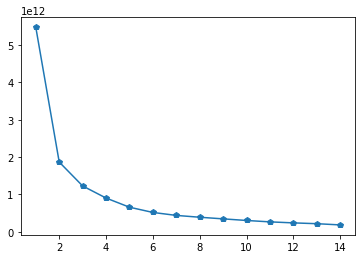

In [29]:
plt.plot(range(1,15),wcss,'p-')

##### from above figure we can see the curve has sharp cutting at k=2.hence clusters should be 2

In [30]:
xx=x[['loan_amount','balance']]

In [31]:
xx

,loan_amount,balance
0,208128,300.0
1,208128,9900.0
2,208128,42599.0
3,208128,42658.2
4,208128,48117.2
...,...,...
863,274740,55159.1
864,274740,83659.1
865,274740,45660.1
866,274740,40960.1


In [32]:
k2=KMeans(n_clusters=2)

In [33]:
m2=k2.fit(xx)

In [34]:
clusters=m2.predict(xx)

In [35]:
silhouette_score(xx,k2.labels_)*100#here we're getting accuracy above 50% which is a good score for clustering

58.6125158744068

In [36]:
DS_clustered=xx
DS_clustered

,loan_amount,balance
0,208128,300.0
1,208128,9900.0
2,208128,42599.0
3,208128,42658.2
4,208128,48117.2
...,...,...
863,274740,55159.1
864,274740,83659.1
865,274740,45660.1
866,274740,40960.1


In [37]:
DS_clustered.insert(0,"Account_id",df['account_id'])
DS_clustered.head()

,Account_id,loan_amount,balance
0,790,208128,300.0
1,790,208128,9900.0
2,790,208128,42599.0
3,790,208128,42658.2
4,790,208128,48117.2


In [38]:
DS_clustered['Cluster']=clusters
DS_clustered.head()

,Account_id,loan_amount,balance,Cluster
0,790,208128,300.0,0
1,790,208128,9900.0,0
2,790,208128,42599.0,0
3,790,208128,42658.2,0
4,790,208128,48117.2,0


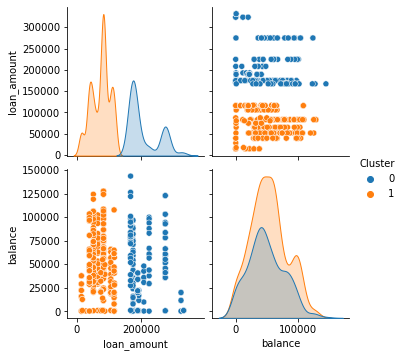

In [39]:
sns.pairplot(DS_clustered,hue='Cluster',vars=['loan_amount','balance'])

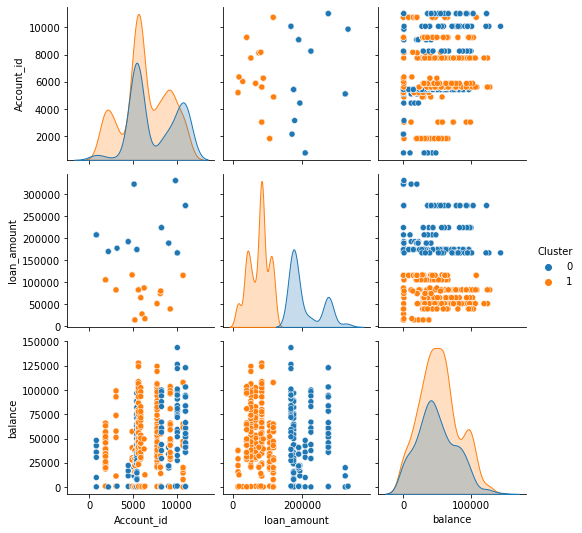

In [40]:
sns.pairplot(DS_clustered,hue='Cluster')

#### Final Datset with clustering will be given as

In [41]:
DS_clustered.head(20)

,Account_id,loan_amount,balance,Cluster
0,790,208128,300.0,0
1,790,208128,9900.0,0
2,790,208128,42599.0,0
3,790,208128,42658.2,0
4,790,208128,48117.2,0
5,790,208128,35817.2,0
6,790,208128,35974.6,0
7,790,208128,30674.6,0
8,1843,105804,1000.0,1
9,1843,105804,18632.0,1


In [42]:
#Account IDs fall under Cluster one

c1=list(DS_clustered[DS_clustered['Cluster']==1].Account_id.unique())
c1

[1843,
 3050,
 4894,
 5215,
 5622,
 5891,
 6030,
 6273,
 6363,
 7753,
 8129,
 8173,
 9265,
 10738]

In [43]:
#Account IDs fall under Cluster zero

c0=list(DS_clustered[DS_clustered['Cluster']==0].Account_id.unique())
c0

[790, 2167, 3166, 4448, 5120, 5442, 8260, 9093, 9869, 10079, 11013]

In [44]:
#     Clustered_DS=
Clustered_DS=pd.concat([df,DS_clustered['Cluster']],axis=1)

In [45]:

#Clustered_DS.to_excel('Clustered_Dataset.xlsx')


### hierarchical clustering

In [46]:
x_hc=df[['loan_amount','balance']]
x_hc.head()

,loan_amount,balance
0,208128,300.0
1,208128,9900.0
2,208128,42599.0
3,208128,42658.2
4,208128,48117.2


In [47]:
from sklearn.cluster import AgglomerativeClustering

In [48]:
AC=AgglomerativeClustering(n_clusters=2)

In [49]:
md=AC.fit_predict(x_hc)

In [50]:
silhouette_score(x_hc,AC.labels_)

0.586125158744068

In [51]:
import scipy.cluster.hierarchy as sch

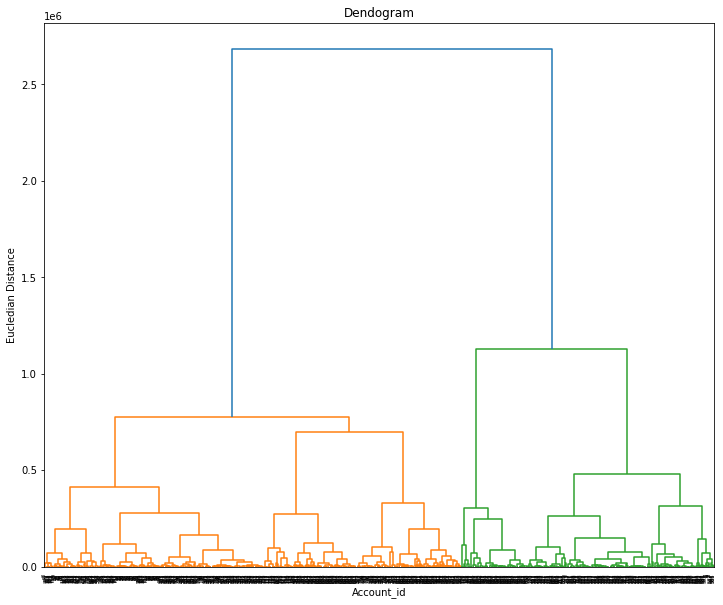

In [52]:
plt.figure(figsize=(12,10))
dendogram=sch.dendrogram(sch.linkage(x_hc,method='ward'))
plt.title("Dendogram")
plt.xlabel("Account_id")
plt.ylabel("Eucledian Distance")
plt.show()